Caso 2: Modelo linear

$$Y = X \beta + \epsilon \text{ com}$$

$$\epsilon \sim N(0, \sigma^2 V)$$

com $V$ positiva definida, conhecida, $V\neq I$

# Modelo autorregressivo de ordem 1

$$\begin{align}
y_i &= \beta_0 + \beta_1 x_i + \varepsilon_i \\
\varepsilon_i &= \rho \varepsilon_{i-1} + \nu_i \\
\mathbb{E}[\nu_i] &= 0,\quad \text{Var}(\nu_i) = \sigma_\nu^2,\quad \text{Cov}(\nu_i, \nu_j) = 0 \quad \text{para } i \neq j
\end{align}$$

A matriz de variâncias e covariâncias dos erros pode ser escrita como

$$\text{Cov}(\boldsymbol{\varepsilon}) = \sigma^2_\nu \mathbf{V},\quad \text{com } V_{ij} = \rho^{|i-j|}$$

$$
\mathbf{V} =
\begin{bmatrix}
1 & \rho & \rho^2 & \cdots & \rho^{n-1} \\
\rho & 1 & \rho & \cdots & \rho^{n-2} \\
\rho^2 & \rho & 1 & \cdots & \rho^{n-3} \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
\rho^{n-1} & \rho^{n-2} & \rho^{n-3} & \cdots & 1
\end{bmatrix}
$$



### Estimador de Mínimos Quadrados Ponderados (GLS)

Como o vetor de erros ${\varepsilon}$ não possui variância constante (devido à autocorrelação), o estimador adequado é o de Mínimos Quadrados Generalizados (GLS):

$$
\hat{{\beta}}_{\text{GLS}} = (\mathbf{X}^\top \mathbf{V}^{-1} \mathbf{X})^{-1} \mathbf{X}^\top \mathbf{V}^{-1} \mathbf{y}
$$

Onde:

- $\mathbf{X}$ é a matriz de regressores, incluindo a coluna de 1s para o intercepto e os valores de $x_i$,
- $\mathbf{y}$ é o vetor de respostas $y_i$,
-  $\mathbf{V}$ é a matriz de covariância dos erros com estrutura AR(1), definida por:


$$
\mathbf{V} =
\begin{bmatrix}
1 & \rho & \rho^2 & \cdots & \rho^{n-1} \\
\rho & 1 & \rho & \cdots & \rho^{n-2} \\
\rho^2 & \rho & 1 & \cdots & \rho^{n-3} \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
\rho^{n-1} & \rho^{n-2} & \rho^{n-3} & \cdots & 1
\end{bmatrix}
$$

=== Estimativa OLS ===
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     780.9
Date:                Tue, 29 Apr 2025   Prob (F-statistic):           1.77e-48
Time:                        19:51:58   Log-Likelihood:                -147.32
No. Observations:                 100   AIC:                             298.6
Df Residuals:                      98   BIC:                             303.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0533      0.

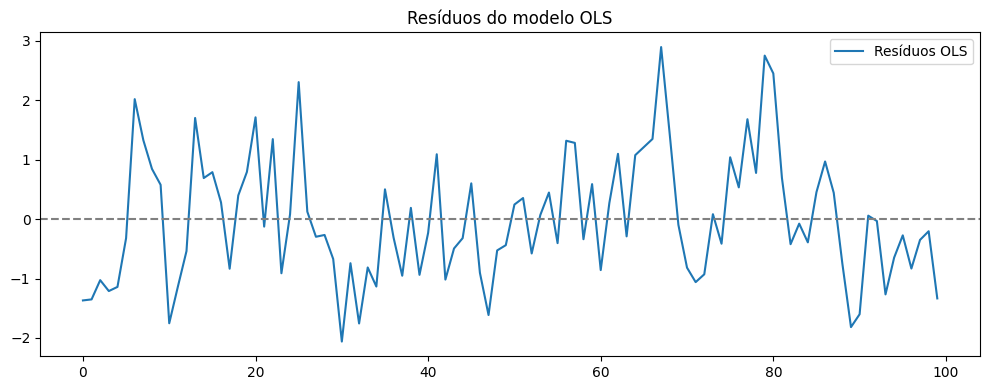

In [11]:
import numpy as np
import statsmodels.api as sm
from scipy.linalg import toeplitz
import matplotlib.pyplot as plt


# Simulação do modelo linear com uma covariável com erros AR(1)

np.random.seed(42)
n = 100
beta0 = 2.0
beta1 = 3.5
rho = 0.6
sigma_nu = 1.0

# Gerar variável explicativa x
x = np.random.normal(0, 1, n)

# Gerar ruído nu e erro epsilon com estrutura AR(1)
nu = np.random.normal(0, sigma_nu, n)
epsilon = np.zeros(n)
epsilon[0] = nu[0]
for i in range(1, n):
    epsilon[i] = rho * epsilon[i-1] + nu[i]

# Gerar variável resposta y
y = beta0 + beta1 * x + epsilon


# Estimativa por Mínimos Quadrados Ordinários (OLS)

X = sm.add_constant(x)
ols_model = sm.OLS(y, X).fit()
print("=== Estimativa OLS ===")
print(ols_model.summary())


# Resíduos
residuals_ols = ols_model.resid
plt.figure(figsize=(10, 4))
plt.plot(residuals_ols, label='Resíduos OLS')
plt.axhline(0, color='gray', linestyle='--')
plt.title('Resíduos do modelo OLS')
plt.legend()
plt.tight_layout()
plt.show()


In [12]:
# Estimativa por Mínimos Quadrados Ponderados (GLS)

# Construir matriz de covariância V com estrutura AR(1)
V = toeplitz(rho ** np.arange(n))
V_inv = np.linalg.inv(V)

# Estimador GLS: (X'V^{-1}X)^{-1} X'V^{-1}y
Xt_Vinv = X.T @ V_inv
beta_gls = np.linalg.inv(Xt_Vinv @ X) @ Xt_Vinv @ y

print("\n=== Estimativa GLS ===")
print(f"Beta0 (intercepto): {beta_gls[0]:.4f}")
print(f"Beta1 (coef. de x): {beta_gls[1]:.4f}")



=== Estimativa GLS ===
Beta0 (intercepto): 2.0242
Beta1 (coef. de x): 3.4041


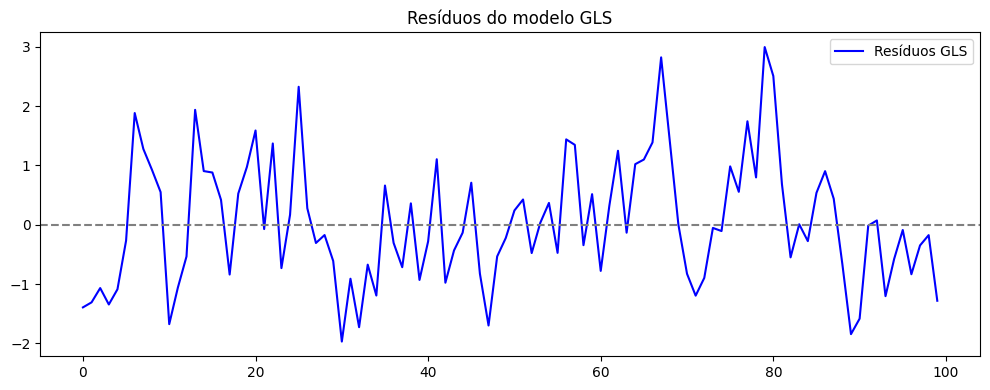

In [13]:
# Previsão dos valores ajustados com GLS
y_gls_hat = X @ beta_gls

# Resíduos do GLS: y - ŷ
residuals_gls = y - y_gls_hat


plt.figure(figsize=(10, 4))
plt.plot(residuals_gls, label='Resíduos GLS', color='blue')
plt.axhline(0, color='gray', linestyle='--')
plt.title('Resíduos do modelo GLS')
plt.legend()
plt.tight_layout()
plt.show()